# Exploratory Data Analysis

###### Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
## Credentials of our spotify 'app' KIBRAM
CLIENT_ID = 'd32d970f8a764cdab2105e8b30ea57a5'
CLIENT_SECRET = 'b79d137c445342b985da989370f8febc'

In [3]:
manager = SpotifyClientCredentials(client_id = CLIENT_ID, client_secret = CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = manager)

### Data collection

Note that the spotify database is in the variable `sp`. We directly implement some pre-processing steps, like verifying for and getting rid of data containing `None` values, 

In [4]:
## Unfortunately, Spotify only allows fetching data for a maximum of 50 tracks at once
#### ALBUMS
al_name = []
al_type = []
al_id = []
al_img = [] 

al_artists = []
al_artist_ids = []
al_URI = []
al_realease = []

for i in range(0,1000,50):
    raw_albums = sp.search(q = 'year:2023', type = 'album', limit = 50,offset = i)
    for i, album in enumerate(raw_albums['albums']['items']):
        if album is not None:
            al_name.append(album['name'])
            al_type.append(album['album_type'])
            al_id.append(album['id'])
            al_img.append(album['images'][0]['url'])

            art_name = [album['artists'][j]['name'] for j in range(len(album['artists']))]
            art_id = [album['artists'][j]['id'] for j in range(len(album['artists']))]
            al_artists.append(art_name)
            al_artist_ids.append(art_id)        

            al_URI.append(album['uri'])
            al_realease.append(album['release_date'])

In [5]:
#### ARTISTS
ar_name = []
ar_followers = []
ar_genres = []
ar_id = []
ar_img = []
ar_popularity = []
ar_URI = []

for i in range(0,650,50):
    raw_artists = sp.search(q = 'year:2023', type = 'artist', limit = 50,offset = i)
    for i, artist in enumerate(raw_artists['artists']['items']):
        if artist is not None:
            ar_name.append(artist['name'])
            ar_followers.append(artist['followers']['total'])

            genre = "None" if len(artist['genres']) == 0 else artist['genres'][0]
            ar_genres.append(genre)

            ar_id.append(artist['id'])
            ar_popularity.append(artist['popularity'])
            ar_URI.append(artist['uri'])

            img_url = "None" if len(artist['images']) == 0 else artist['images'][0]['url']
            ar_img.append(img_url)

In [6]:
#### TRACKS
tr_name = []
tr_id = []

tr_popularity = []
tr_URI = []

tr_art_id = []
tr_art_name = []
tr_art_img = []

tr_alb_id = []
tr_alb_name = []
tr_alb_img = []



for i in range(0,1000,50):
    raw_tracks = sp.search(q = 'year:2023', type = 'track', limit = 50,offset = i)
    for i, track in enumerate(raw_tracks['tracks']['items']):
        
        tr_name.append(track['name'])
        tr_id.append(track['id'])
        tr_popularity.append(track['popularity'])
        tr_URI.append(track['uri'])
        
        
        art_name = [track['artists'][j]['name'] for j in range(len(track['artists']))]
        art_id = [track['artists'][j]['id'] for j in range(len(track['artists']))]
        img_url = "None" if len(artist['images']) == 0 else artist['images'][0]['url']
        tr_art_img.append(img_url)
        tr_art_name.append(art_name)
        tr_art_id.append(art_id)
        
        img_url = "None" if len(artist['images']) == 0 else artist['images'][0]['url']
        tr_alb_img.append(img_url)
        tr_alb_name.append(track['album']['name'])
        tr_alb_id.append(track['album']['id'])    

##### Spotify audio features

1. Confidence measures

    - Acousticness: A measure from 0.0 to 1.0 that detects acoustic sounds in a track.

    - Liveness: A measure from 0.0 to 1.0 that detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

    - Speechiness: A measure from 0.0 to 1.0 that detects the presence of spoken words in a track. The more speech sounds are heard in the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the value will be.

    - Instrumentalness A measure from 0.0 to 1 that reflects the extent to which a track does not contain vocalizations. The closer the instrumentalness value is to 1.0, the greater the likelihood that the track does not contain vocal content.

2. Cerceptual measures

    - Energy: A measure from 0.0 to 1.0 that reflects the intensity of a track. Energetic tracks are usually fast, loud, and noisy.

    - Loudness: A measure from -60 and 0 that represents the overall loudness of a track. This value is measured in decibels (dB). Loudness values are averaged across the entire track.

    - Danceability: A measure from 0.0 to 1 that indicates how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, and beat strength. A value closer to 0.0 indicates that a track is less danceable, and value closer to 1.0 is indicates that a track is more danceable.

    - Valence: A measure from 0.0 to 1.0 that reflects the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

3. Music descriptors

    - Tempo: The overall estimated speed of a track measured in beats per minute (BPM).

    - Duration: The duration of a track measured in milliseconds.

    - Key: A measure from 0 to 11 that indicates the key of a track.

    - Mode: A measure that indicates the key in the music of the track (1 is major, and 0 is for minor).

In [7]:
#### AUDIO FEATURES
acousticness = []
danceability = []
duration = []
energy = []
instrumentalness = []
key = []
liveness = []
loudness = []
modality = []
speechiness = []
tempo = []
valence = [] # positiveness of a track
id_withfeatures = []


for track_id in tr_id:
    audio_info = sp.audio_features(track_id)[0]
    if audio_info is not None:
        acousticness.append(audio_info['acousticness'])
        danceability.append(audio_info['danceability'])
        duration.append(audio_info['duration_ms'])
        energy.append(audio_info['energy'])
        instrumentalness.append(audio_info['instrumentalness'])
        key.append(audio_info['key'])
        liveness.append(audio_info['liveness'])
        loudness.append(audio_info['loudness'])
        modality.append(audio_info['mode'])
        speechiness.append(audio_info['speechiness'])
        tempo.append(audio_info['tempo'])
        valence.append(audio_info['valence'])
        id_withfeatures.append(track_id)    

### Data exploration and cleaning

In [8]:
df_artist = pd.DataFrame({'id' : ar_id, 'name': ar_name, 'followers' : ar_followers, 'genres' : ar_genres, 
                          'popularity' : ar_popularity, 'URI' : ar_URI, 'image URL' : ar_img})
df_artist.dropna(inplace = True)

df_album = pd.DataFrame({'id' : al_id, 'name': al_name, 'type' : al_type, 'artists' : al_artists, 
                          'artists ids' : al_artist_ids, 'URI' : al_URI, 
                         'release date' : al_realease, 'image URL' : al_img})
df_album.dropna(inplace = True)

df_track = pd.DataFrame({'id' : tr_id, 'name': tr_name, 'popularity' : tr_popularity, 'URI' : tr_URI, 
                         'artist id' : tr_art_id, 'artist name' : tr_art_name,'artist image URL' : tr_art_img,
                        'album id' : tr_alb_id, 'album name' : tr_alb_name})
df_track.dropna(inplace = True)

df_audiofeat = pd.DataFrame({'id' : id_withfeatures, 'acousticness' : acousticness, 'danceability' : danceability, 
                             'duration' : duration, 'energy' : energy, 'instrumentalness' : instrumentalness,
                            'key' : key, 'liveness' : liveness, 'loudness' : loudness, 'modality' : modality,
                            'speechiness' : speechiness, 'tempo' : tempo,'valence' : valence})
df_audiofeat.dropna(inplace = True)


In [9]:
df_artist.head()

,id,name,followers,genres,popularity,URI,image URL
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,75537721,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...
1,3TVXtAsR1Inumwj472S9r4,Drake,75662865,canadian hip hop,95,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...
2,4oUHIQIBe0LHzYfvXNW4QM,Morgan Wallen,6002880,contemporary country,91,spotify:artist:4oUHIQIBe0LHzYfvXNW4QM,https://i.scdn.co/image/ab6761610000e5eb0266f7...
3,4q3ewBCX7sLwd24euuV69X,Bad Bunny,69745842,reggaeton,97,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://i.scdn.co/image/ab6761610000e5ebe63fa6...
4,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,65553522,canadian contemporary r&b,95,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5eb01b9b4...


In [10]:
df_album.head()

,id,name,type,artists,artists ids,URI,release date,image URL
0,6i7mF7whyRJuLJ4ogbH2wh,One Thing At A Time,album,[Morgan Wallen],[4oUHIQIBe0LHzYfvXNW4QM],spotify:album:6i7mF7whyRJuLJ4ogbH2wh,2023-03-03,https://i.scdn.co/image/ab67616d0000b273705079...
1,6ciIG1XKTlVIn0Yl8rvsce,Almost Healed,album,[Lil Durk],[3hcs9uc56yIGFCSy9leWe7],spotify:album:6ciIG1XKTlVIn0Yl8rvsce,2023-05-26,https://i.scdn.co/image/ab67616d0000b2736234c2...
2,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),album,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],spotify:album:1fnJ7k0bllNfL1kVdNVW1A,2023-05-26,https://i.scdn.co/image/ab67616d0000b273fa7476...
3,4kS7bSuU0Jm9LYMosFU2x5,MAÑANA SERÁ BONITO,album,[KAROL G],[790FomKkXshlbRYZFtlgla],spotify:album:4kS7bSuU0Jm9LYMosFU2x5,2023-02-24,https://i.scdn.co/image/ab67616d0000b27382de1c...
4,19O46pvAPG1Xg6fxAuSU5F,Midnights (The Til Dawn Edition),album,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],spotify:album:19O46pvAPG1Xg6fxAuSU5F,2023-05-26,https://i.scdn.co/image/ab67616d0000b273092cee...


In [11]:
df_track.head()

,id,name,popularity,URI,artist id,artist name,artist image URL,album id,album name
0,3dnP0JxCgygwQH9Gm7q7nb,Ella Baila Sola,99,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,"[0XeEobZplHxzM9QzFQWLiR, 12GqGscKJx3aE4t07u7eVZ]","[Eslabon Armado, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,3Mm1P5CEEAiuJqBclr2EyU,Ella Baila Sola
1,6pD0ufEQq0xdHSsRbg9LBK,un x100to,100,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,"[6XkjpgcEsYab502Vr1bBeW, 4q3ewBCX7sLwd24euuV69X]","[Grupo Frontera, Bad Bunny]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,7aGzSSUD8S6IhPCsZSiuMT,un x100to
2,6AQbmUe0Qwf5PZnt4HmTXv,Boy's a Liar Pt. 2,95,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,"[78rUTD7y6Cy67W1RVzYs7t, 3LZZPxNDGDFVSIPqf4JuEf]","[PinkPantheress, Ice Spice]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6cVfHBcp3AdpYY0bBglkLN,Boy's a liar Pt. 2
3,2UW7JaomAMuX9pZrjVpHAU,La Bebe - Remix,99,spotify:track:2UW7JaomAMuX9pZrjVpHAU,"[1NNRWkhwmcXRimFYSBpB1y, 12GqGscKJx3aE4t07u7eVZ]","[Yng Lvcas, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6aBVGuOUEuX18rHxyDWbti,La Bebe (Remix)
4,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,98,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,[4GJ6xDCF5jaUqD6avOuQT6],[FIFTY FIFTY],https://i.scdn.co/image/ab6761610000e5eb31f6ab...,5letLUZIFsQikJYShfGNs4,The Beginning: Cupid


In [115]:
df_track['full_name'] = df_track['name'] + ', by : ' + df_track['artist name'].apply(lambda x: ', '.join(x))

In [116]:
df_track.head()

,id,name,popularity,URI,artist id,artist name,artist image URL,album id,album name,full_name
1,6pD0ufEQq0xdHSsRbg9LBK,un x100to,100,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,"[6XkjpgcEsYab502Vr1bBeW, 4q3ewBCX7sLwd24euuV69X]","[Grupo Frontera, Bad Bunny]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,7aGzSSUD8S6IhPCsZSiuMT,un x100to,"un x100to, by : Grupo Frontera, Bad Bunny"
0,3dnP0JxCgygwQH9Gm7q7nb,Ella Baila Sola,99,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,"[0XeEobZplHxzM9QzFQWLiR, 12GqGscKJx3aE4t07u7eVZ]","[Eslabon Armado, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,3Mm1P5CEEAiuJqBclr2EyU,Ella Baila Sola,"Ella Baila Sola, by : Eslabon Armado, Peso Pluma"
3,2UW7JaomAMuX9pZrjVpHAU,La Bebe - Remix,99,spotify:track:2UW7JaomAMuX9pZrjVpHAU,"[1NNRWkhwmcXRimFYSBpB1y, 12GqGscKJx3aE4t07u7eVZ]","[Yng Lvcas, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6aBVGuOUEuX18rHxyDWbti,La Bebe (Remix),"La Bebe - Remix, by : Yng Lvcas, Peso Pluma"
4,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,98,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,[4GJ6xDCF5jaUqD6avOuQT6],[FIFTY FIFTY],https://i.scdn.co/image/ab6761610000e5eb31f6ab...,5letLUZIFsQikJYShfGNs4,The Beginning: Cupid,"Cupid - Twin Ver., by : FIFTY FIFTY"
12,1odExI7RdWc4BT515LTAwj,Daylight,97,spotify:track:1odExI7RdWc4BT515LTAwj,[33NVpKoXjItPwUJTMZIOiY],[David Kushner],https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6NcI39WPu4kY6Tul11nhSv,Daylight,"Daylight, by : David Kushner"


In [12]:
'''
We decided to focus on the top 200 tracks and artists based on popularity score, 
whereas we kept in our albums dataframe only the albums in which the artists (or artist) appear
in the top 200 artists, or as the artists of the top 200 tracks
''' 

df_artist.sort_values(by=['popularity'], ascending = False, inplace = True)
df_track.sort_values(by=['popularity'], ascending = False, inplace = True)

df_art = df_artist.head(200)
df_tra = df_track.head(500)

In [13]:
df_art.head()

,id,name,followers,genres,popularity,URI,image URL
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,75537721,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...
3,4q3ewBCX7sLwd24euuV69X,Bad Bunny,69745842,reggaeton,97,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://i.scdn.co/image/ab6761610000e5ebe63fa6...
4,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,65553522,canadian contemporary r&b,95,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5eb01b9b4...
1,3TVXtAsR1Inumwj472S9r4,Drake,75662865,canadian hip hop,95,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...
9,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,3767515,corrido,94,spotify:artist:12GqGscKJx3aE4t07u7eVZ,https://i.scdn.co/image/ab6761610000e5eb6ea226...


In [14]:
df_tra.head()

,id,name,popularity,URI,artist id,artist name,artist image URL,album id,album name
1,6pD0ufEQq0xdHSsRbg9LBK,un x100to,100,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,"[6XkjpgcEsYab502Vr1bBeW, 4q3ewBCX7sLwd24euuV69X]","[Grupo Frontera, Bad Bunny]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,7aGzSSUD8S6IhPCsZSiuMT,un x100to
0,3dnP0JxCgygwQH9Gm7q7nb,Ella Baila Sola,99,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,"[0XeEobZplHxzM9QzFQWLiR, 12GqGscKJx3aE4t07u7eVZ]","[Eslabon Armado, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,3Mm1P5CEEAiuJqBclr2EyU,Ella Baila Sola
3,2UW7JaomAMuX9pZrjVpHAU,La Bebe - Remix,99,spotify:track:2UW7JaomAMuX9pZrjVpHAU,"[1NNRWkhwmcXRimFYSBpB1y, 12GqGscKJx3aE4t07u7eVZ]","[Yng Lvcas, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6aBVGuOUEuX18rHxyDWbti,La Bebe (Remix)
4,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,98,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,[4GJ6xDCF5jaUqD6avOuQT6],[FIFTY FIFTY],https://i.scdn.co/image/ab6761610000e5eb31f6ab...,5letLUZIFsQikJYShfGNs4,The Beginning: Cupid
12,1odExI7RdWc4BT515LTAwj,Daylight,97,spotify:track:1odExI7RdWc4BT515LTAwj,[33NVpKoXjItPwUJTMZIOiY],[David Kushner],https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6NcI39WPu4kY6Tul11nhSv,Daylight


In [15]:
top200_artists_names = list(df_art['name'])
top500_track_artists_names = sum(list(df_tra['artist name']), [])
top_artists = list(set(top200_artists_names + top500_track_artists_names))

df_alb = df_album.copy()
for i in range(len(df_album)):
    artists = df_album.iloc[i]['artists']
    if any(artist in top_artists for artist in artists):
        df_alb.drop(index = i) 
        

In [16]:
df_alb.head()

,id,name,type,artists,artists ids,URI,release date,image URL
0,6i7mF7whyRJuLJ4ogbH2wh,One Thing At A Time,album,[Morgan Wallen],[4oUHIQIBe0LHzYfvXNW4QM],spotify:album:6i7mF7whyRJuLJ4ogbH2wh,2023-03-03,https://i.scdn.co/image/ab67616d0000b273705079...
1,6ciIG1XKTlVIn0Yl8rvsce,Almost Healed,album,[Lil Durk],[3hcs9uc56yIGFCSy9leWe7],spotify:album:6ciIG1XKTlVIn0Yl8rvsce,2023-05-26,https://i.scdn.co/image/ab67616d0000b2736234c2...
2,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),album,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],spotify:album:1fnJ7k0bllNfL1kVdNVW1A,2023-05-26,https://i.scdn.co/image/ab67616d0000b273fa7476...
3,4kS7bSuU0Jm9LYMosFU2x5,MAÑANA SERÁ BONITO,album,[KAROL G],[790FomKkXshlbRYZFtlgla],spotify:album:4kS7bSuU0Jm9LYMosFU2x5,2023-02-24,https://i.scdn.co/image/ab67616d0000b27382de1c...
4,19O46pvAPG1Xg6fxAuSU5F,Midnights (The Til Dawn Edition),album,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],spotify:album:19O46pvAPG1Xg6fxAuSU5F,2023-05-26,https://i.scdn.co/image/ab67616d0000b273092cee...


### Pre-analysis

In [17]:
df_art.head()

,id,name,followers,genres,popularity,URI,image URL
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,75537721,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...
3,4q3ewBCX7sLwd24euuV69X,Bad Bunny,69745842,reggaeton,97,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://i.scdn.co/image/ab6761610000e5ebe63fa6...
4,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,65553522,canadian contemporary r&b,95,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5eb01b9b4...
1,3TVXtAsR1Inumwj472S9r4,Drake,75662865,canadian hip hop,95,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...
9,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,3767515,corrido,94,spotify:artist:12GqGscKJx3aE4t07u7eVZ,https://i.scdn.co/image/ab6761610000e5eb6ea226...


<AxesSubplot:xlabel='genres'>

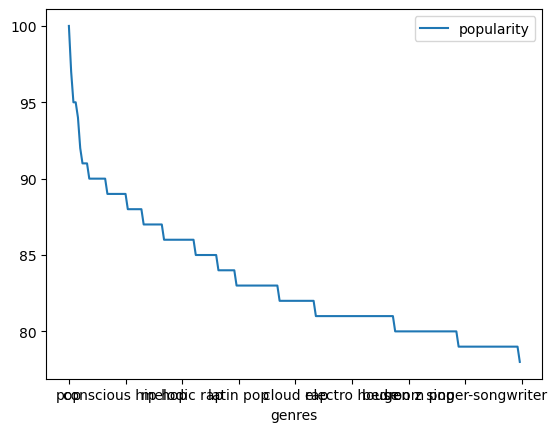

In [18]:
df_art.plot(x='genres', y = 'popularity')

genres
afrobeats              AxesSubplot(0.125,0.11;0.775x0.77)
afrofuturism           AxesSubplot(0.125,0.11;0.775x0.77)
album rock             AxesSubplot(0.125,0.11;0.775x0.77)
alt z                  AxesSubplot(0.125,0.11;0.775x0.77)
alternative hip hop    AxesSubplot(0.125,0.11;0.775x0.77)
                                      ...                
reggae                 AxesSubplot(0.125,0.11;0.775x0.77)
reggaeton              AxesSubplot(0.125,0.11;0.775x0.77)
reggaeton flow         AxesSubplot(0.125,0.11;0.775x0.77)
trap boricua           AxesSubplot(0.125,0.11;0.775x0.77)
trap latino            AxesSubplot(0.125,0.11;0.775x0.77)
Name: popularity, Length: 85, dtype: object

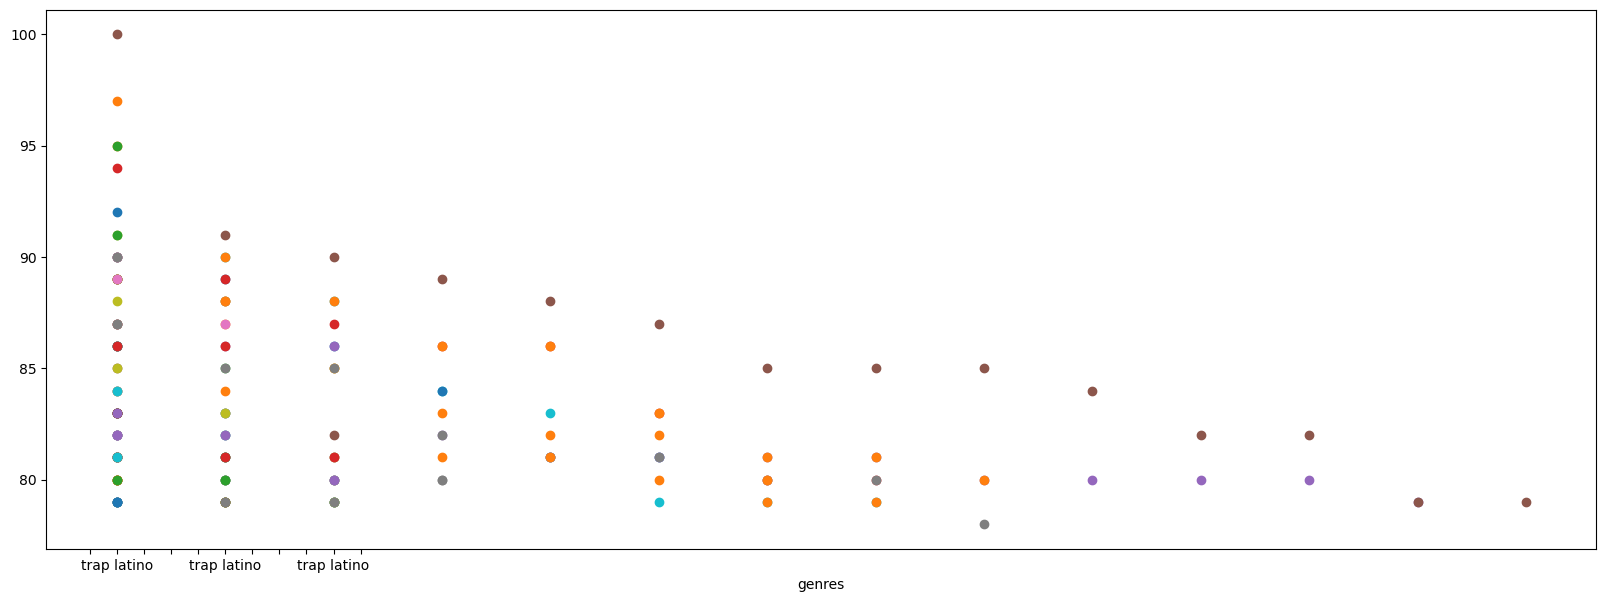

In [19]:
df_art_cleaned = df_art[df_art['genres'] != 'None']

df_art_cleaned.set_index('genres', inplace=True)
df_art_cleaned.groupby('genres')['popularity'].plot(style = 'o', figsize = (20,7))

In [20]:
df_genres = df_art.groupby(['genres'])['genres'].count()
df_genres.sort_values(ascending = False, inplace = True)
df_genres.head(10)

genres
pop              14
dance pop        13
hip hop           9
k-pop             9
reggaeton         8
atl hip hop       8
corrido           8
latin hip hop     7
colombian pop     6
r&b               4
Name: genres, dtype: int64

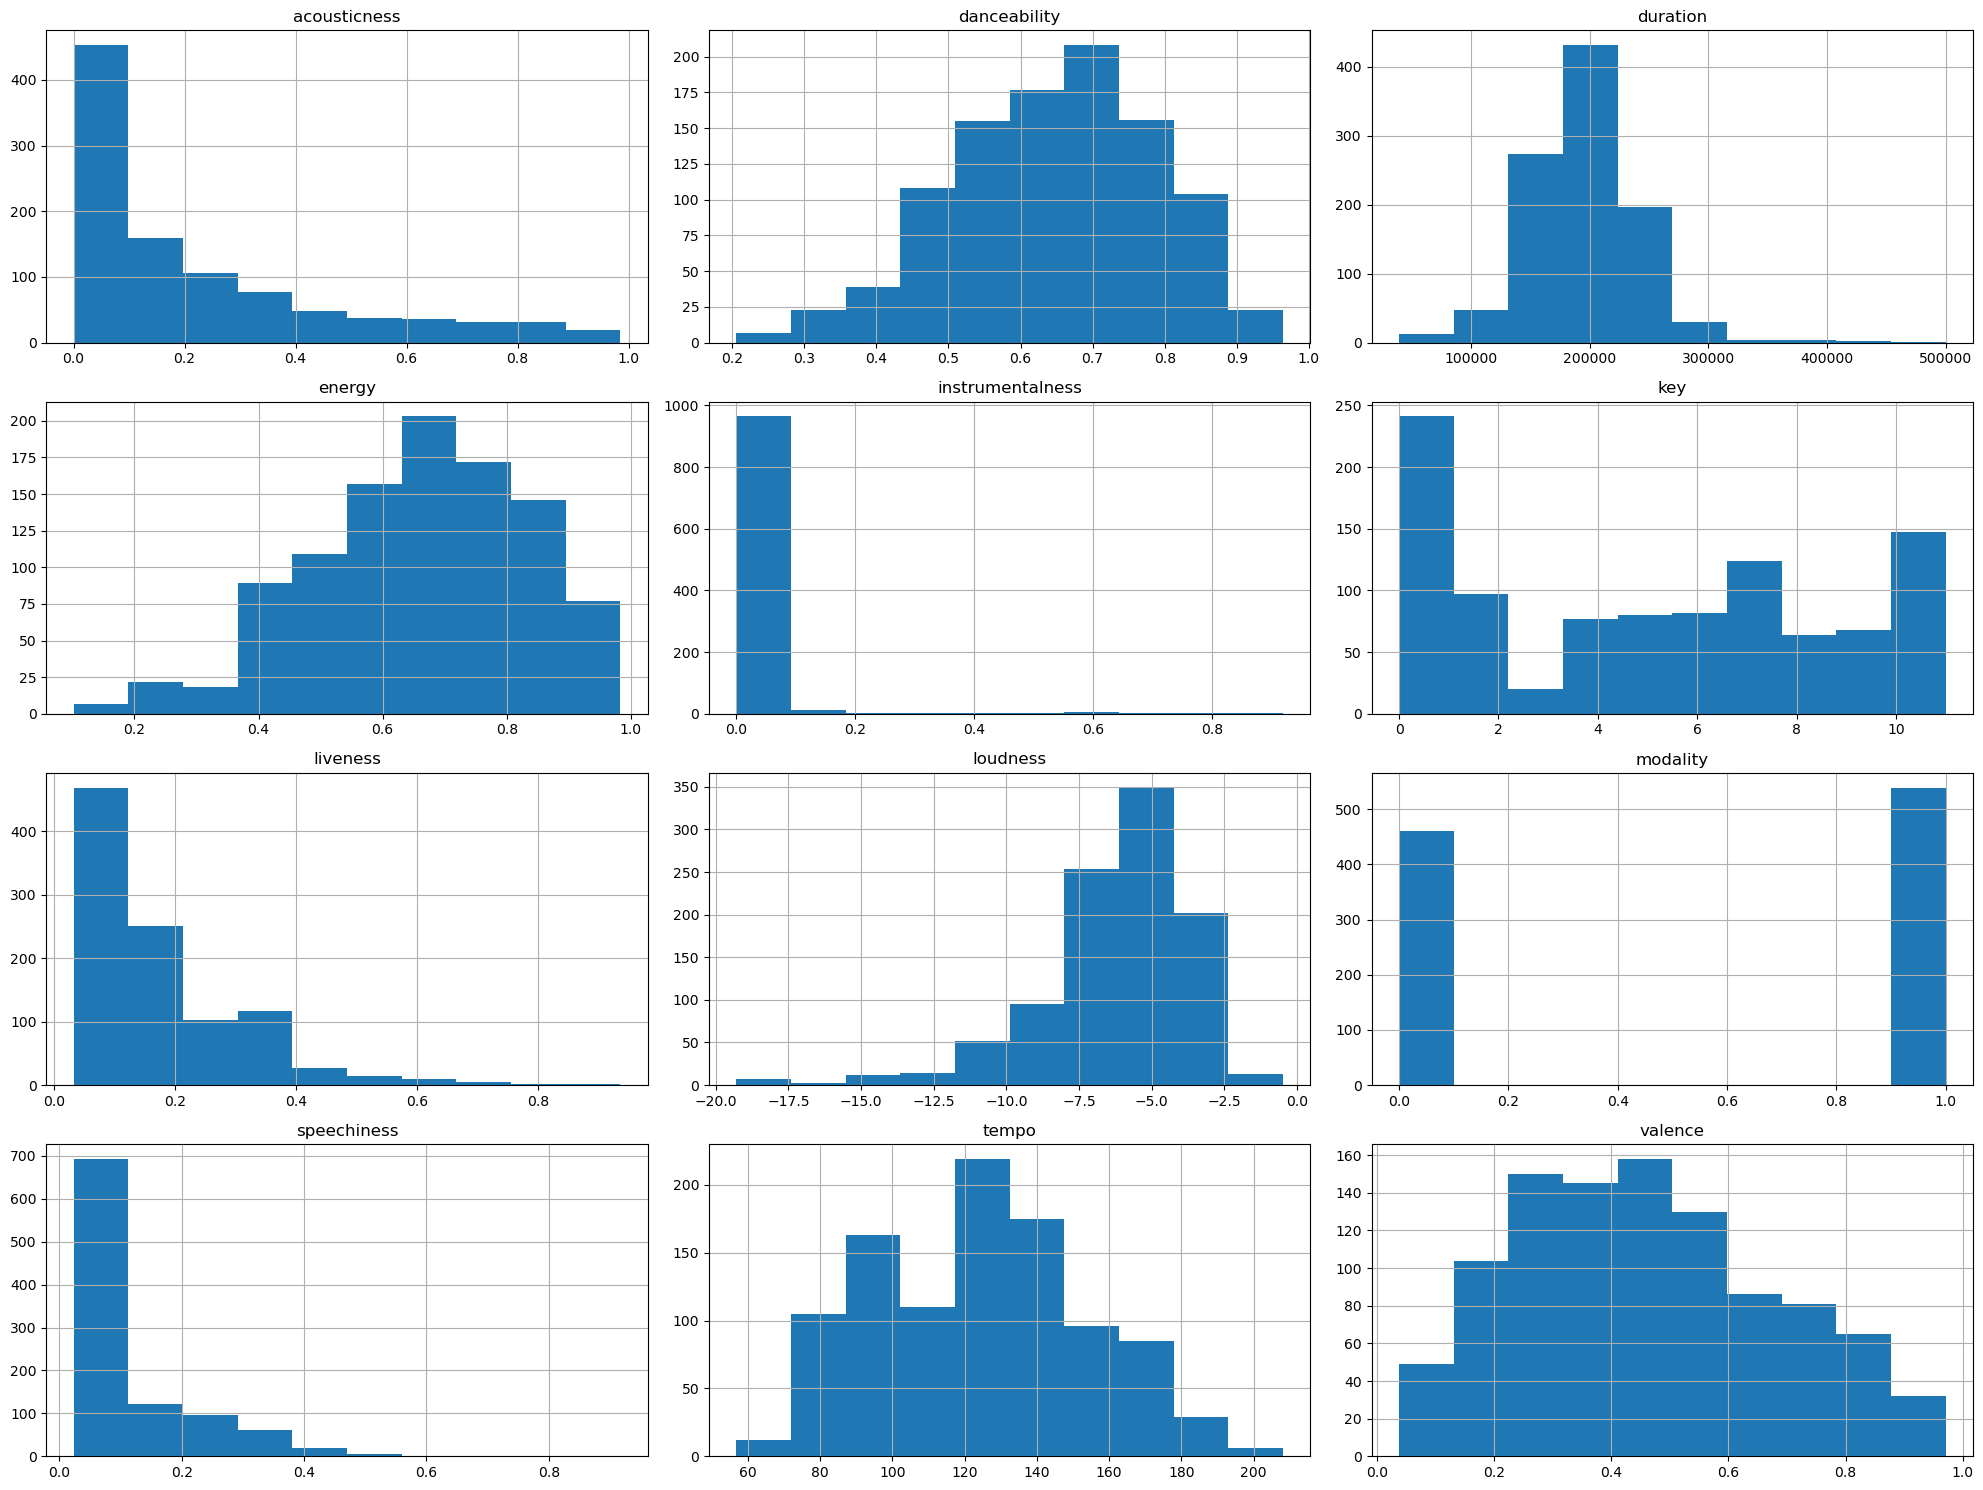

In [21]:
### AUDIO PRE-ANALYSIS
counter = 0

plt.rcParams["figure.figsize"] = [20, 15]
plt.rcParams["figure.autolayout"] = True


fig, axes = plt.subplots(4, 3)

for feature in df_audiofeat.drop('id', axis = 1):
    i = counter // 3
    j = counter % 3
    df_audiofeat.hist(feature, ax = axes[i,j])
    counter += 1

plt.show()
fig.savefig('histograms.png')

In [22]:
df_audiofeat

df_audiofeat["popularity"] = 0

for track_id in df_audiofeat.id:
    df_audiofeat.loc[df_audiofeat.id == track_id, 'popularity'] = df_track.loc[df_track['id'] == track_id, 'popularity']
    

In [23]:
print(len(df_audiofeat))
df_audiofeat.head()

1000


,id,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,modality,speechiness,tempo,valence,popularity
0,3dnP0JxCgygwQH9Gm7q7nb,0.483,0.668,165671,0.758,0.000019,5,0.0837,-5.176,0,0.0332,147.989,0.834,99
1,6pD0ufEQq0xdHSsRbg9LBK,0.228,0.569,194563,0.724,0.000000,6,0.2700,-4.076,0,0.0474,83.118,0.562,100
2,6AQbmUe0Qwf5PZnt4HmTXv,0.252,0.696,131013,0.809,0.000128,5,0.2480,-8.254,1,0.0500,132.962,0.857,95
3,2UW7JaomAMuX9pZrjVpHAU,0.213,0.812,234353,0.479,0.000001,2,0.0756,-5.678,0,0.3330,169.922,0.559,99
4,7FbrGaHYVDmfr7KoLIZnQ7,0.435,0.783,174253,0.592,0.000004,11,0.3470,-8.332,0,0.0331,120.018,0.726,98


/var/folders/yg/3p9mz6dn327c9cp3ct66p4yr0000gn/T/ipykernel_65231/2163237465.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_audiofeat.corr()


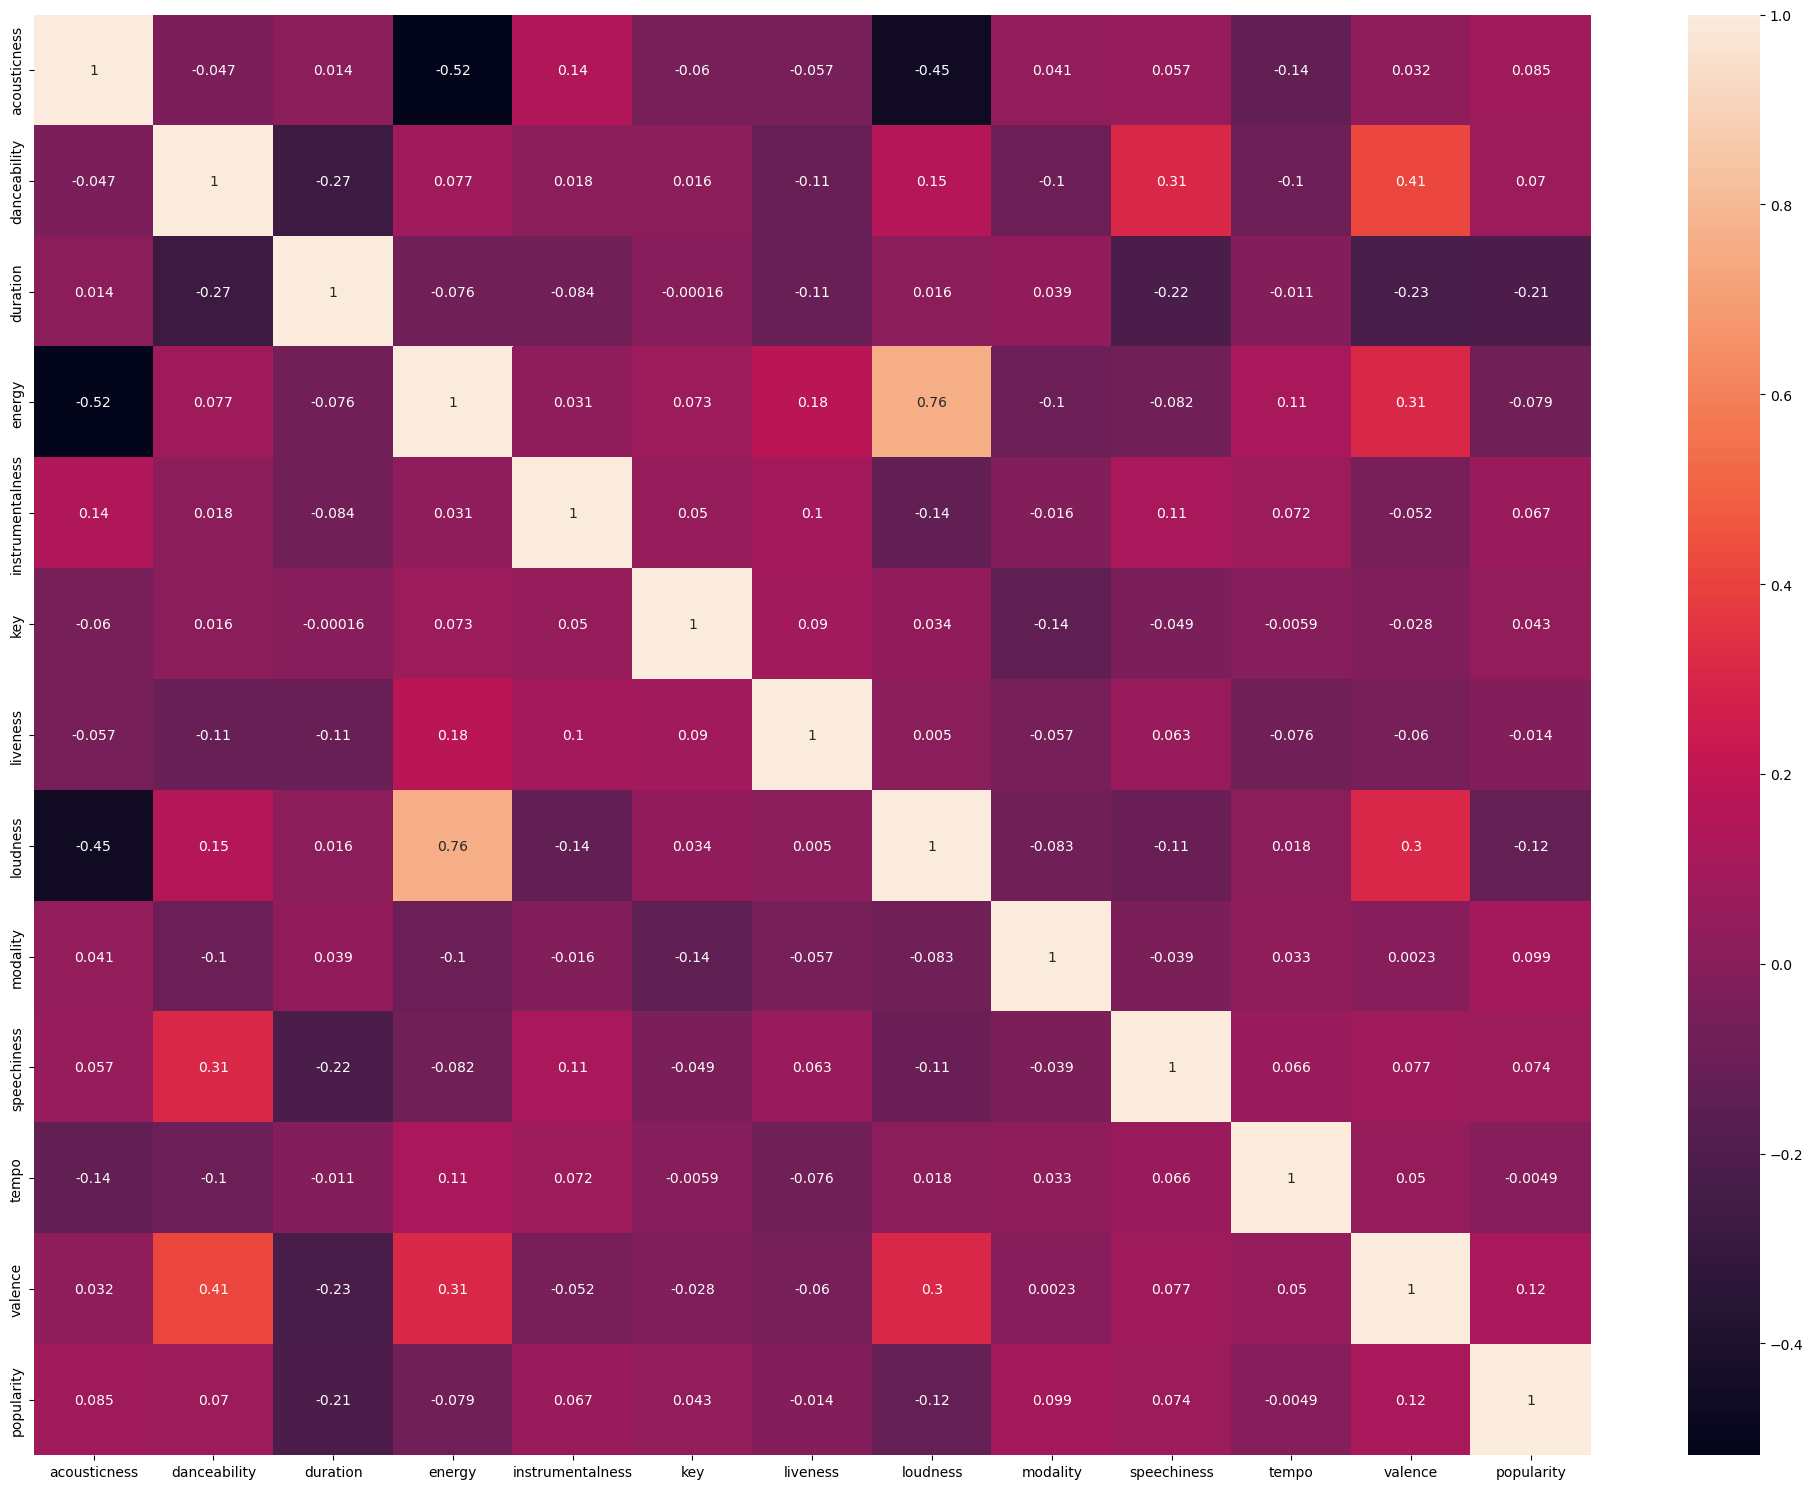

In [24]:
## CORRELATION BETWEEN FEATURES 
corr_matrix = df_audiofeat.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### PCA and K-means clustering on audio features

In [25]:
from sklearn import preprocessing as prep
from sklearn import decomposition as dec
from sklearn.cluster import KMeans
from yellowbrick import cluster as cl 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [97]:
features = df_audiofeat.copy()
features = features.dropna()
features.head()

,id,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,modality,speechiness,tempo,valence,popularity
0,3dnP0JxCgygwQH9Gm7q7nb,0.483,0.668,165671,0.758,0.000019,5,0.0837,-5.176,0,0.0332,147.989,0.834,99
1,6pD0ufEQq0xdHSsRbg9LBK,0.228,0.569,194563,0.724,0.000000,6,0.2700,-4.076,0,0.0474,83.118,0.562,100
2,6AQbmUe0Qwf5PZnt4HmTXv,0.252,0.696,131013,0.809,0.000128,5,0.2480,-8.254,1,0.0500,132.962,0.857,95
3,2UW7JaomAMuX9pZrjVpHAU,0.213,0.812,234353,0.479,0.000001,2,0.0756,-5.678,0,0.3330,169.922,0.559,99
4,7FbrGaHYVDmfr7KoLIZnQ7,0.435,0.783,174253,0.592,0.000004,11,0.3470,-8.332,0,0.0331,120.018,0.726,98


In [98]:
len(features)

1000

In [99]:
### PCA

sc = prep.StandardScaler()
pca = dec.PCA()

features_std = sc.fit_transform(features.drop(columns= ['id']))
pca.fit(features_std)

PCA()

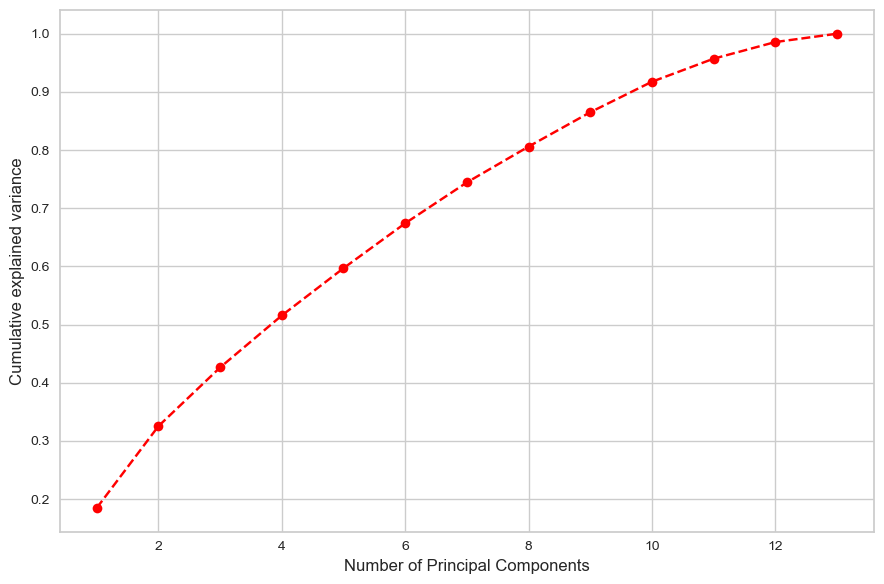

In [100]:
evr = pca.explained_variance_ratio_

fig = plt.figure(figsize=(9,6))
plt.plot(range(1, len(df_audiofeat.columns)), evr.cumsum(), marker='o', linestyle='--', color='red')
plt.xlabel('Number of Principal Components', fontsize = 12)
plt.ylabel('Cumulative explained variance', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [101]:
for n, e in enumerate(evr.cumsum()):
    if e >= 0.8:
        n_comps = n + 1
        break
print("Optimal number of components:", n_comps)
pca = dec.PCA(n_components=n_comps)
pca.fit(features_std)
sc_pca = pca.transform(features_std)

Optimal number of components: 8


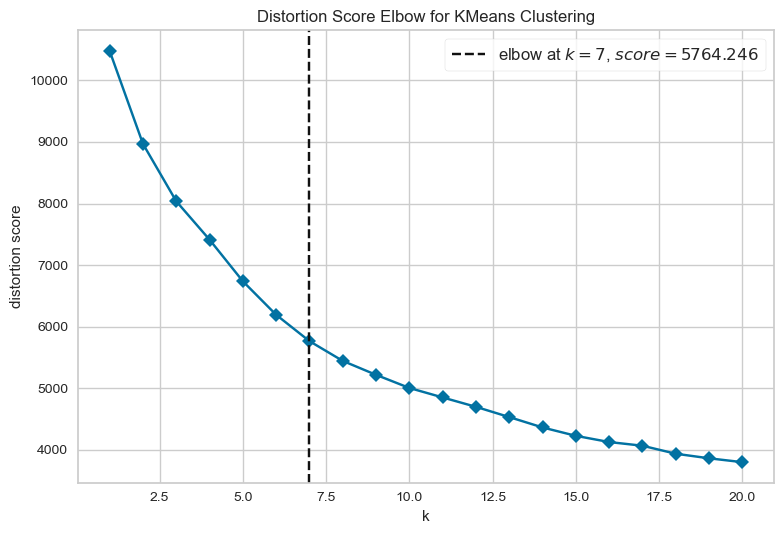

Optimal number of clusters: 7


In [102]:
### K-means clustering

visualizer = cl.KElbowVisualizer(KMeans(init='k-means++', random_state=30), k=(1,21), timings=False)
visualizer.fit(sc_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

In [103]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=30)
kmeans_pca.fit(sc_pca);

In [104]:
df_seg_pca_kmeans = pd.concat([features.reset_index(drop=True), pd.DataFrame(sc_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,id,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,modality,...,popularity,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Cluster
0,3dnP0JxCgygwQH9Gm7q7nb,0.483,0.668,165671,0.758,0.000019,5,0.0837,-5.176,0,...,99,-0.800226,1.239084,-0.692418,0.141396,-0.484781,-1.547798,0.704666,-1.903361,4
1,6pD0ufEQq0xdHSsRbg9LBK,0.228,0.569,194563,0.724,0.000000,6,0.2700,-4.076,0,...,100,-0.697666,-0.020943,0.600093,-1.024320,-1.709226,-0.141665,0.144378,-0.864965,4
2,6AQbmUe0Qwf5PZnt4HmTXv,0.252,0.696,131013,0.809,0.000128,5,0.2480,-8.254,1,...,95,-0.683714,1.623700,-0.265684,1.097185,-1.668758,-0.212434,0.116704,-0.753706,4
3,2UW7JaomAMuX9pZrjVpHAU,0.213,0.812,234353,0.479,0.000001,2,0.0756,-5.678,0,...,99,0.141362,1.769290,-0.849800,0.518521,1.915499,-0.652472,-0.885595,-0.245724,2
4,7FbrGaHYVDmfr7KoLIZnQ7,0.435,0.783,174253,0.592,0.000004,11,0.3470,-8.332,0,...,98,0.151242,1.519906,1.180789,-1.138001,-1.360285,-1.397587,0.026646,-0.865942,4


In [117]:
df_scatter_final = pd.merge(df_track, df_seg_pca_kmeans)

In [119]:
df_scatter_final.head()

,id,name,popularity,URI,artist id,artist name,artist image URL,album id,album name,full_name,...,valence,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Cluster
0,6pD0ufEQq0xdHSsRbg9LBK,un x100to,100,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,"[6XkjpgcEsYab502Vr1bBeW, 4q3ewBCX7sLwd24euuV69X]","[Grupo Frontera, Bad Bunny]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,7aGzSSUD8S6IhPCsZSiuMT,un x100to,"un x100to, by : Grupo Frontera, Bad Bunny",...,0.562,-0.697666,-0.020943,0.600093,-1.024320,-1.709226,-0.141665,0.144378,-0.864965,4
1,3dnP0JxCgygwQH9Gm7q7nb,Ella Baila Sola,99,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,"[0XeEobZplHxzM9QzFQWLiR, 12GqGscKJx3aE4t07u7eVZ]","[Eslabon Armado, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,3Mm1P5CEEAiuJqBclr2EyU,Ella Baila Sola,"Ella Baila Sola, by : Eslabon Armado, Peso Pluma",...,0.834,-0.800226,1.239084,-0.692418,0.141396,-0.484781,-1.547798,0.704666,-1.903361,4
2,2UW7JaomAMuX9pZrjVpHAU,La Bebe - Remix,99,spotify:track:2UW7JaomAMuX9pZrjVpHAU,"[1NNRWkhwmcXRimFYSBpB1y, 12GqGscKJx3aE4t07u7eVZ]","[Yng Lvcas, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6aBVGuOUEuX18rHxyDWbti,La Bebe (Remix),"La Bebe - Remix, by : Yng Lvcas, Peso Pluma",...,0.559,0.141362,1.769290,-0.849800,0.518521,1.915499,-0.652472,-0.885595,-0.245724,2
3,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,98,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,[4GJ6xDCF5jaUqD6avOuQT6],[FIFTY FIFTY],https://i.scdn.co/image/ab6761610000e5eb31f6ab...,5letLUZIFsQikJYShfGNs4,The Beginning: Cupid,"Cupid - Twin Ver., by : FIFTY FIFTY",...,0.726,0.151242,1.519906,1.180789,-1.138001,-1.360285,-1.397587,0.026646,-0.865942,4
4,1odExI7RdWc4BT515LTAwj,Daylight,97,spotify:track:1odExI7RdWc4BT515LTAwj,[33NVpKoXjItPwUJTMZIOiY],[David Kushner],https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6NcI39WPu4kY6Tul11nhSv,Daylight,"Daylight, by : David Kushner",...,0.324,2.947915,0.081303,-0.472233,-0.202007,-0.225075,-0.789782,0.442897,-2.012759,3


In [120]:
print(len(df_scatter_final))

1000


In [121]:
df_scatter_final.to_csv("/Users/ines/Documents/GitHub/project-2023-kibram/Milestone3/website/data/final_clustering.csv")

In [105]:
import random

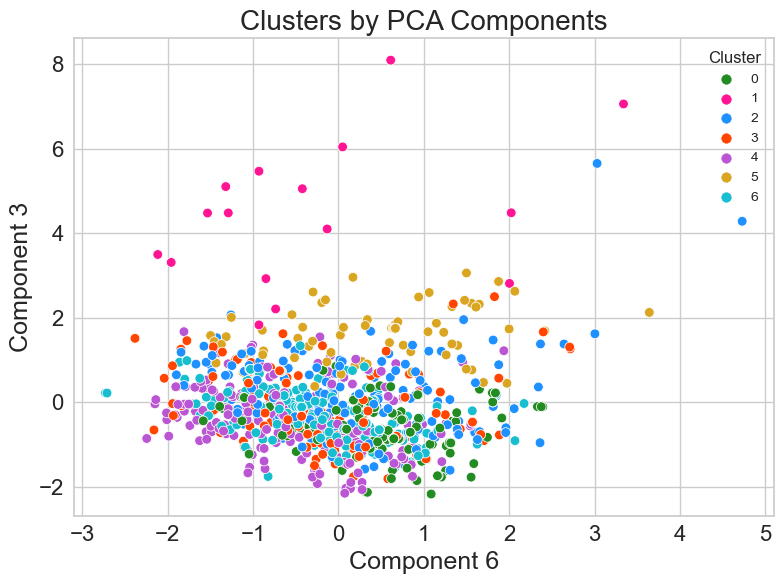

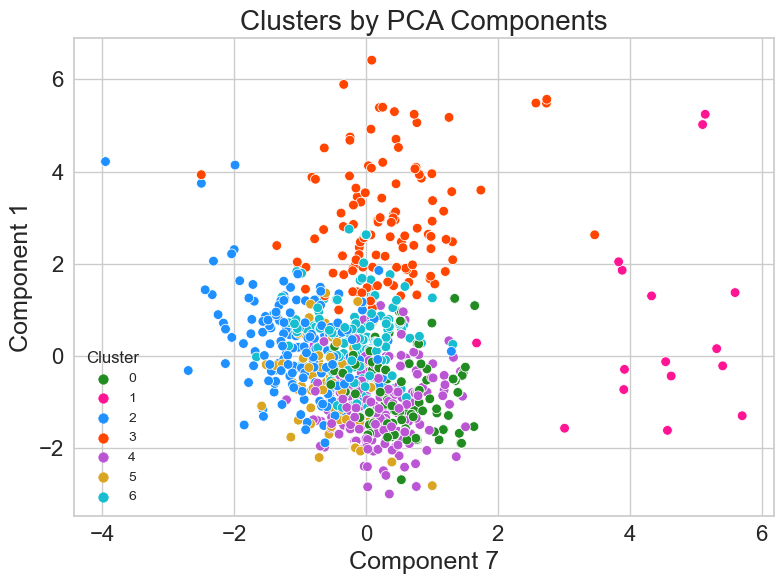

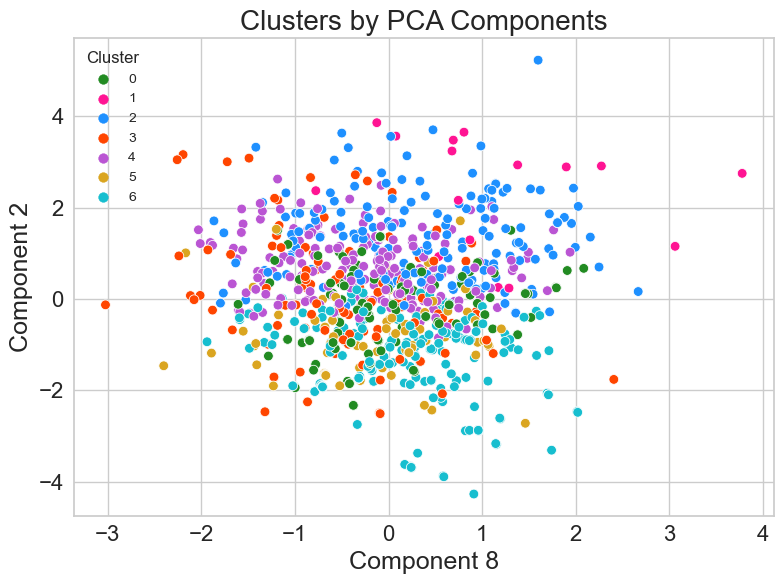

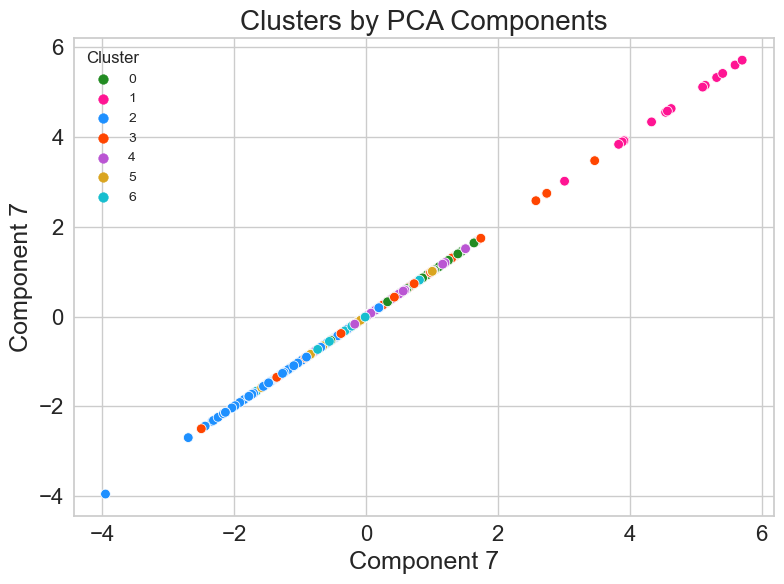

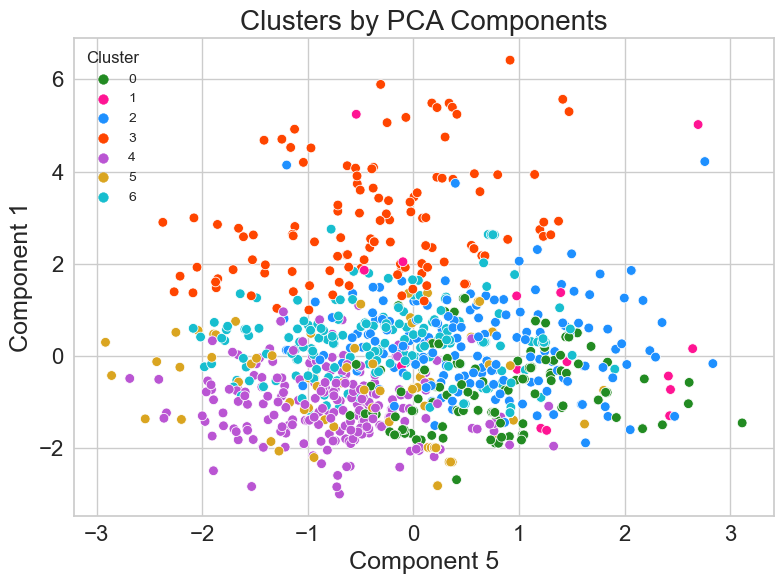

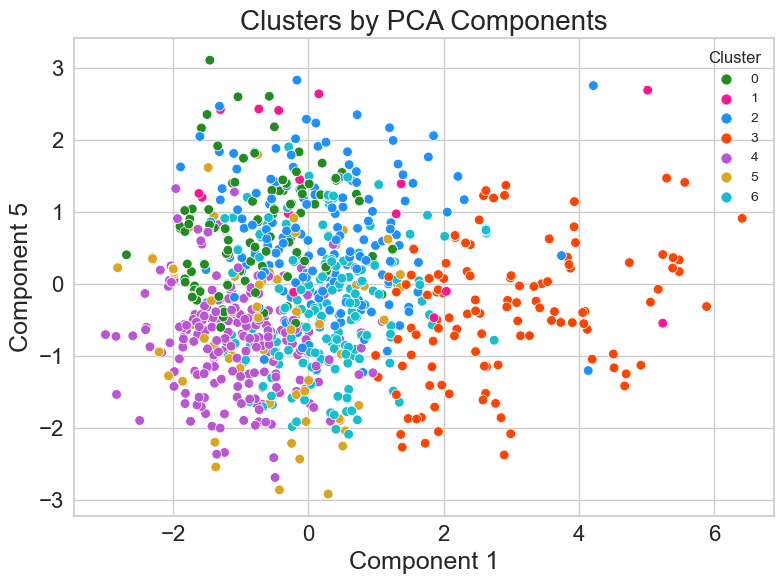

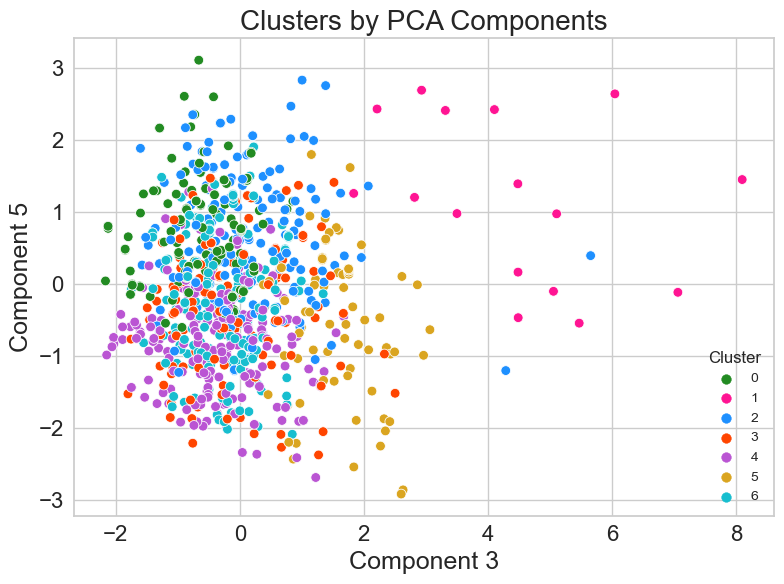

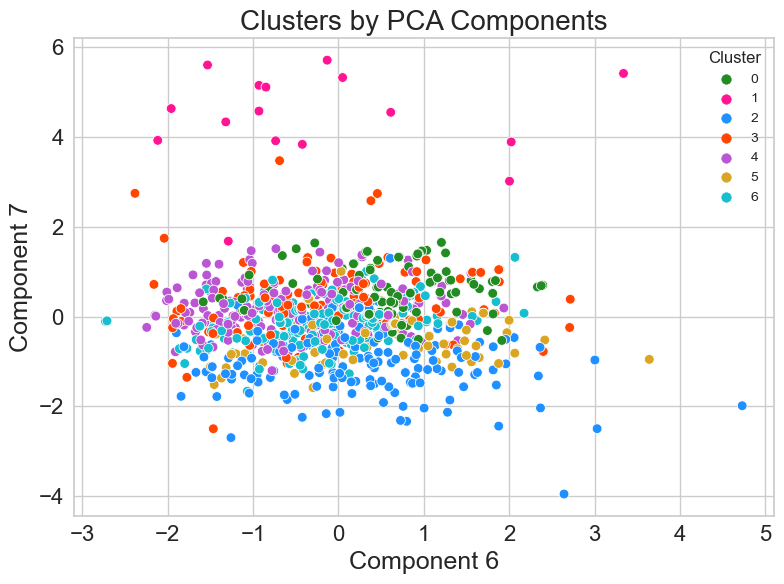

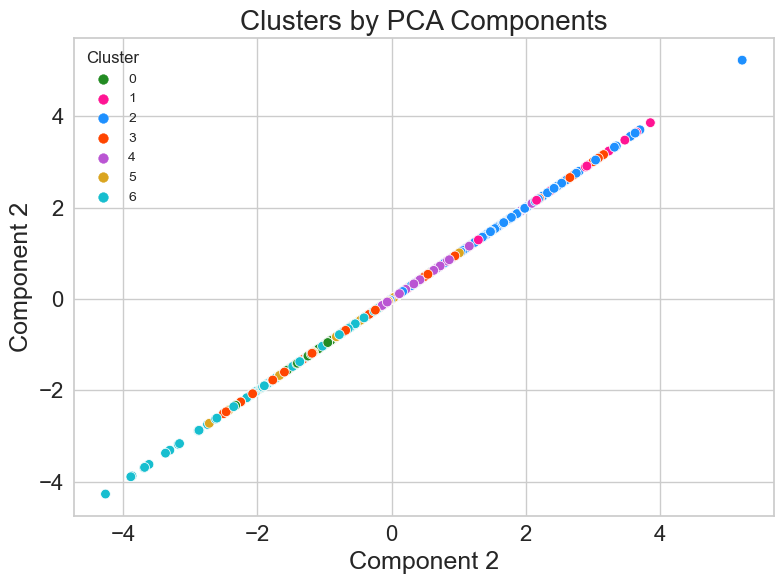

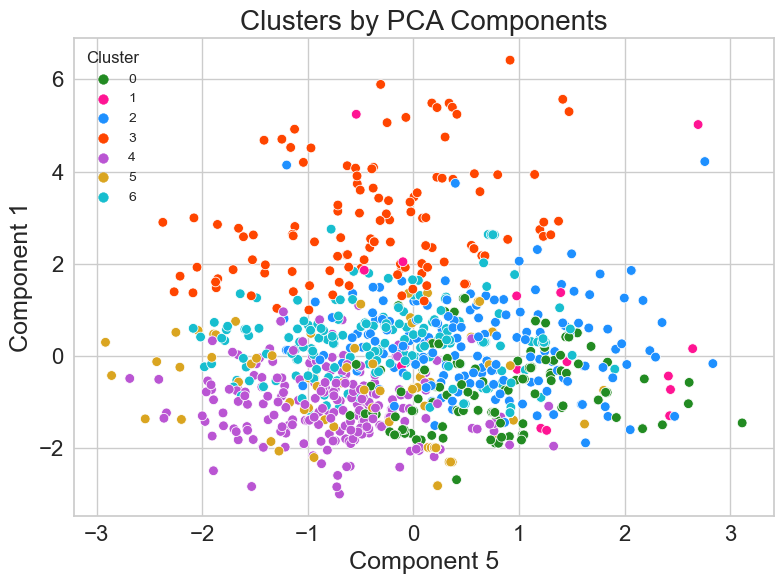

In [106]:
pc1 = df_seg_pca_kmeans['Component 1']
pc2 = df_seg_pca_kmeans['Component 2']
pc3 = df_seg_pca_kmeans['Component 3']
pc4 = df_seg_pca_kmeans['Component 4']
pc5 = df_seg_pca_kmeans['Component 5']
pc6 = df_seg_pca_kmeans['Component 6']
pc7 = df_seg_pca_kmeans['Component 7']
pc8 = df_seg_pca_kmeans['Component 8']


PCs = (pc1, pc2, pc3, pc4, pc5, pc6, pc7, pc8)

column_headers = list(df_seg_pca_kmeans.columns)
column_headers = column_headers[-9:len(column_headers)-1]

for i in range(10):
    xi = random.choice(range(len(column_headers)))
    yi = random.choice(range(len(column_headers)))
    xa = PCs[xi]
    ya = PCs[yi]
    fig = plt.figure(figsize=(8, 6))
    sns.scatterplot(x = xa, y = ya, hue=df_seg_pca_kmeans['Cluster'], palette = ['forestgreen', 'deeppink', 'dodgerblue', 'orangered', 'mediumorchid', 'goldenrod', 'tab:cyan'])
    plt.title('Clusters by PCA Components', fontsize=20)
    plt.xlabel(str(column_headers[xi]), fontsize=18)
    plt.ylabel(str(column_headers[yi]), fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    if (i % 4 == 0):
        fig.savefig(str(column_headers[xi]) + str(column_headers[xi]) + '.png')


In [107]:
df_seg_pca_kmeans.columns

Index(['id', 'acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'modality',
       'speechiness', 'tempo', 'valence', 'popularity', 'Component 1',
       'Component 2', 'Component 3', 'Component 4', 'Component 5',
       'Component 6', 'Component 7', 'Component 8', 'Cluster'],
      dtype='object')

In [108]:
print(len(df_seg_pca_kmeans))

1000


In [109]:
print(len(df_audiofeat))

1000


In [110]:
df_scatter = pd.merge(df_audiofeat, df_seg_pca_kmeans)

In [111]:
df_scatter.head()

,id,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,modality,...,popularity,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Cluster
0,3dnP0JxCgygwQH9Gm7q7nb,0.483,0.668,165671,0.758,0.000019,5,0.0837,-5.176,0,...,99,-0.800226,1.239084,-0.692418,0.141396,-0.484781,-1.547798,0.704666,-1.903361,4
1,6pD0ufEQq0xdHSsRbg9LBK,0.228,0.569,194563,0.724,0.000000,6,0.2700,-4.076,0,...,100,-0.697666,-0.020943,0.600093,-1.024320,-1.709226,-0.141665,0.144378,-0.864965,4
2,6AQbmUe0Qwf5PZnt4HmTXv,0.252,0.696,131013,0.809,0.000128,5,0.2480,-8.254,1,...,95,-0.683714,1.623700,-0.265684,1.097185,-1.668758,-0.212434,0.116704,-0.753706,4
3,2UW7JaomAMuX9pZrjVpHAU,0.213,0.812,234353,0.479,0.000001,2,0.0756,-5.678,0,...,99,0.141362,1.769290,-0.849800,0.518521,1.915499,-0.652472,-0.885595,-0.245724,2
4,7FbrGaHYVDmfr7KoLIZnQ7,0.435,0.783,174253,0.592,0.000004,11,0.3470,-8.332,0,...,98,0.151242,1.519906,1.180789,-1.138001,-1.360285,-1.397587,0.026646,-0.865942,4


In [112]:
print(len(df_scatter))

1000


In [ ]:
df_scatter = df_seg_pca_kmeans[['Component 1', 'Component 2', 'Component 3', 'popularity', 'Cluster', ]].copy()

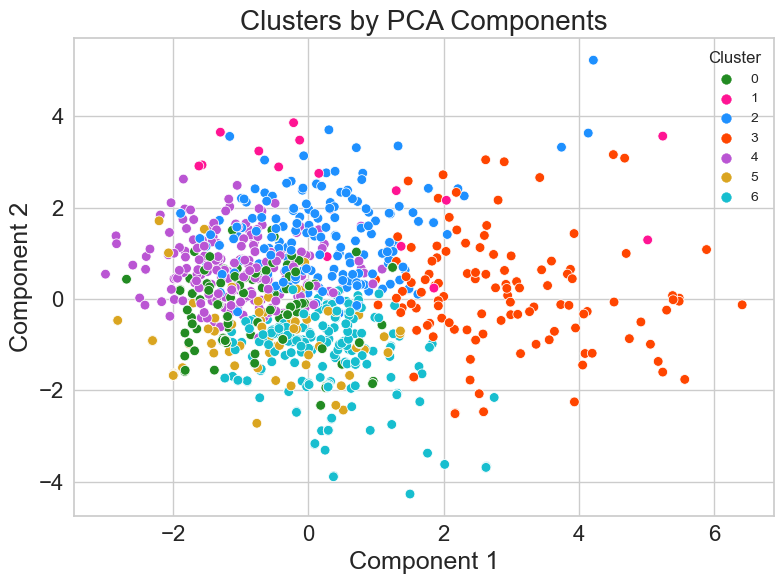

In [36]:
    xa = pc1
    ya = pc2
    fig = plt.figure(figsize=(8, 6))
    sns.scatterplot(x = xa, y = ya, hue=df_seg_pca_kmeans['Cluster'], palette = ['forestgreen', 'deeppink', 'dodgerblue', 'orangered', 'mediumorchid', 'goldenrod', 'tab:cyan'])
    plt.title('Clusters by PCA Components', fontsize=20)
    plt.xlabel('Component 1', fontsize=18)
    plt.ylabel('Component 2', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [37]:
df_audiofeat.head(1)
print(len(df_audiofeat))

1000


In [38]:
df_seg_pca_kmeans.head(1)
print(len(df_seg_pca_kmeans))

1000


In [39]:
merged = pd.merge(df_audiofeat, df_seg_pca_kmeans)
merged.head()

,id,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,modality,...,popularity,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Cluster
0,3dnP0JxCgygwQH9Gm7q7nb,0.483,0.668,165671,0.758,0.000019,5,0.0837,-5.176,0,...,99,-0.800226,1.239084,-0.692418,0.141396,-0.484781,-1.547798,0.704666,-1.903361,4
1,6pD0ufEQq0xdHSsRbg9LBK,0.228,0.569,194563,0.724,0.000000,6,0.2700,-4.076,0,...,100,-0.697666,-0.020943,0.600093,-1.024320,-1.709226,-0.141665,0.144378,-0.864965,4
2,6AQbmUe0Qwf5PZnt4HmTXv,0.252,0.696,131013,0.809,0.000128,5,0.2480,-8.254,1,...,95,-0.683714,1.623700,-0.265684,1.097185,-1.668758,-0.212434,0.116704,-0.753706,4
3,2UW7JaomAMuX9pZrjVpHAU,0.213,0.812,234353,0.479,0.000001,2,0.0756,-5.678,0,...,99,0.141362,1.769290,-0.849800,0.518521,1.915499,-0.652472,-0.885595,-0.245724,2
4,7FbrGaHYVDmfr7KoLIZnQ7,0.435,0.783,174253,0.592,0.000004,11,0.3470,-8.332,0,...,98,0.151242,1.519906,1.180789,-1.138001,-1.360285,-1.397587,0.026646,-0.865942,4


In [40]:
merged2 = pd.merge(merged, df_track, on = "id")

In [41]:
merged2.head()

,id,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,modality,...,Component 8,Cluster,name,popularity_y,URI,artist id,artist name,artist image URL,album id,album name
0,3dnP0JxCgygwQH9Gm7q7nb,0.483,0.668,165671,0.758,0.000019,5,0.0837,-5.176,0,...,-1.903361,4,Ella Baila Sola,99,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,"[0XeEobZplHxzM9QzFQWLiR, 12GqGscKJx3aE4t07u7eVZ]","[Eslabon Armado, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,3Mm1P5CEEAiuJqBclr2EyU,Ella Baila Sola
1,6pD0ufEQq0xdHSsRbg9LBK,0.228,0.569,194563,0.724,0.000000,6,0.2700,-4.076,0,...,-0.864965,4,un x100to,100,spotify:track:6pD0ufEQq0xdHSsRbg9LBK,"[6XkjpgcEsYab502Vr1bBeW, 4q3ewBCX7sLwd24euuV69X]","[Grupo Frontera, Bad Bunny]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,7aGzSSUD8S6IhPCsZSiuMT,un x100to
2,6AQbmUe0Qwf5PZnt4HmTXv,0.252,0.696,131013,0.809,0.000128,5,0.2480,-8.254,1,...,-0.753706,4,Boy's a Liar Pt. 2,95,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,"[78rUTD7y6Cy67W1RVzYs7t, 3LZZPxNDGDFVSIPqf4JuEf]","[PinkPantheress, Ice Spice]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6cVfHBcp3AdpYY0bBglkLN,Boy's a liar Pt. 2
3,2UW7JaomAMuX9pZrjVpHAU,0.213,0.812,234353,0.479,0.000001,2,0.0756,-5.678,0,...,-0.245724,2,La Bebe - Remix,99,spotify:track:2UW7JaomAMuX9pZrjVpHAU,"[1NNRWkhwmcXRimFYSBpB1y, 12GqGscKJx3aE4t07u7eVZ]","[Yng Lvcas, Peso Pluma]",https://i.scdn.co/image/ab6761610000e5eb31f6ab...,6aBVGuOUEuX18rHxyDWbti,La Bebe (Remix)
4,7FbrGaHYVDmfr7KoLIZnQ7,0.435,0.783,174253,0.592,0.000004,11,0.3470,-8.332,0,...,-0.865942,4,Cupid - Twin Ver.,98,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,[4GJ6xDCF5jaUqD6avOuQT6],[FIFTY FIFTY],https://i.scdn.co/image/ab6761610000e5eb31f6ab...,5letLUZIFsQikJYShfGNs4,The Beginning: Cupid


In [61]:
final_df = merged2[['id', 'name', 'artist name', 'album name', 'Component 1', 'Component 2', 'Cluster']]
final_df.head()

,id,name,artist name,album name,Component 1,Component 2,Cluster
0,3dnP0JxCgygwQH9Gm7q7nb,Ella Baila Sola,"[Eslabon Armado, Peso Pluma]",Ella Baila Sola,-0.800226,1.239084,4
1,6pD0ufEQq0xdHSsRbg9LBK,un x100to,"[Grupo Frontera, Bad Bunny]",un x100to,-0.697666,-0.020943,4
2,6AQbmUe0Qwf5PZnt4HmTXv,Boy's a Liar Pt. 2,"[PinkPantheress, Ice Spice]",Boy's a liar Pt. 2,-0.683714,1.623700,4
3,2UW7JaomAMuX9pZrjVpHAU,La Bebe - Remix,"[Yng Lvcas, Peso Pluma]",La Bebe (Remix),0.141362,1.769290,2
4,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,[FIFTY FIFTY],The Beginning: Cupid,0.151242,1.519906,4


In [62]:
import os
os.getcwd()

'/Users/ines/Documents/GitHub/project-2023-kibram/Milestone1'

In [63]:
final_df = final_df.rename(columns={"Component 1": "principal_component_1", "Component 2": "principal_component_2", 
                         "Cluster" : "cluster", "artist name" : "artist", "album name" : "album"})
final_df.head(1)

,id,name,artist,album,principal_component_1,principal_component_2,cluster
0,3dnP0JxCgygwQH9Gm7q7nb,Ella Baila Sola,"[Eslabon Armado, Peso Pluma]",Ella Baila Sola,-0.800226,1.239084,4


##### T-SNE

In [69]:
from sklearn import preprocessing as prep
from sklearn.manifold import TSNE

In [70]:
features_tsne = features.copy()

In [71]:
features_tsne.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,modality,speechiness,tempo,valence,popularity
0,0.483,0.668,165671,0.758,0.000019,5,0.0837,-5.176,0,0.0332,147.989,0.834,99
1,0.228,0.569,194563,0.724,0.000000,6,0.2700,-4.076,0,0.0474,83.118,0.562,100
2,0.252,0.696,131013,0.809,0.000128,5,0.2480,-8.254,1,0.0500,132.962,0.857,95
3,0.213,0.812,234353,0.479,0.000001,2,0.0756,-5.678,0,0.3330,169.922,0.559,99
4,0.435,0.783,174253,0.592,0.000004,11,0.3470,-8.332,0,0.0331,120.018,0.726,98


In [80]:
data_features = prep.normalize(features_tsne)

/Users/ines/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000024
[t-SNE] Computed conditional probabilities in 0.049s
[t-SNE] Iteration 50: error = 60.5923691, gradient norm = 0.1183588 (50 iterations in 0.285s)
[t-SNE] Iteration 100: error = 54.9417877, gradient norm = 0.0252354 (50 iterations in 0.186s)
[t-SNE] Iteration 150: error = 54.0139847, gradient norm = 0.0265867 (50 iterations in 0.186s)
[t-SNE] Iteration 200: error = 53.6843185, gradient norm = 0.0272580 (50 iterations in 0.167s)
[t-SNE] Iteration 250: error = 53.5244904, gradient norm = 0.0145942 (50 iterations in 0.175s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.524490
[t-SNE] Iteration 300: error = 0.5449566, gradient norm = 0.0009994 (50 iterations in 0.238s)
[t-SNE] Iteration 350: error = 0.4337223, gradient norm = 0.00033

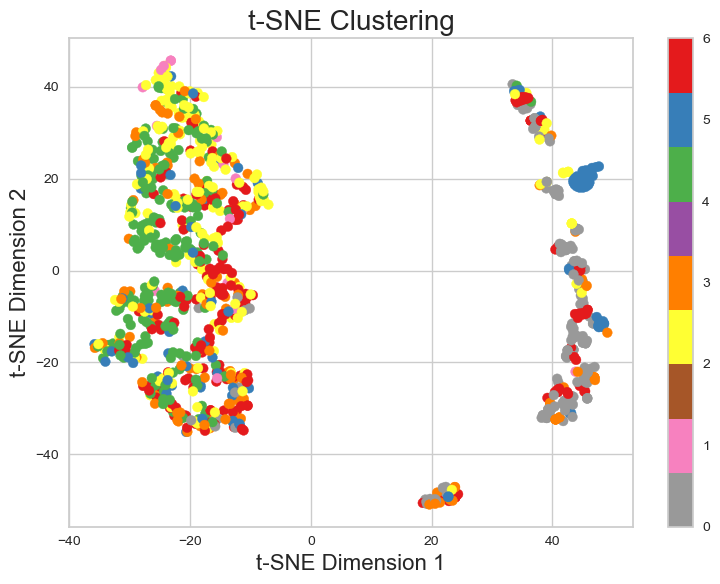

In [81]:
tsne = TSNE(n_components=2, learning_rate=100, perplexity=30, verbose=2, angle=0.1)

# Fit and transform the high-dimensional data into a 2Dspace
data_tsne = tsne.fit_transform(data_features)

# Plot the t-SNE results
fig = plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_tsne[:,0], data_tsne[:,1], c=df_seg_pca_kmeans['Cluster'], cmap = 'Set1_r')
cbar = plt.colorbar(scatter) #cluster labels

# set axis labels and title
plt.xlabel("t-SNE Dimension 1", fontsize=16)
plt.ylabel("t-SNE Dimension 2", fontsize=16)
plt.title('t-SNE Clustering', fontsize=20)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [45]:
final_df.to_csv("/Users/ines/Documents/GitHub/project-2023-kibram/Milestone3/website/data/clustering.csv")

### Artists' Embeds

In [46]:
df_art.head(1)

,id,name,followers,genres,popularity,URI,image URL
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,75537721,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...


In [48]:
df_art.to_csv("/Users/ines/Documents/GitHub/project-2023-kibram/Milestone3/website/data/artists_links2.csv")

In [49]:
final_artists = pd.read_csv("/Users/ines/Documents/GitHub/project-2023-kibram/Milestone3/scripts/artists/artists_output.csv")

In [50]:
final_artists.head()

,Unnamed: 0,id,name,followers,genres,popularity,URI,image URL,embed link
0,0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,75379085,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...,"<iframe style=""border-radius: 12px"" width=""100..."
1,3,4q3ewBCX7sLwd24euuV69X,Bad Bunny,69665117,reggaeton,97,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://i.scdn.co/image/ab6761610000e5ebe63fa6...,"<iframe style=""border-radius: 12px"" width=""100..."
2,4,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,65450589,canadian contemporary r&b,95,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5eb01b9b4...,"<iframe style=""border-radius: 12px"" width=""100..."
3,1,3TVXtAsR1Inumwj472S9r4,Drake,75592260,canadian hip hop,95,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...,"<iframe style=""border-radius: 12px"" width=""100..."
4,9,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,3696751,corrido,94,spotify:artist:12GqGscKJx3aE4t07u7eVZ,https://i.scdn.co/image/ab6761610000e5eb6ea226...,"<iframe style=""border-radius: 12px"" width=""100..."


In [51]:
final_artists = final_artists.rename(columns = {"embed link": "embed_link", "image URL" : "image_url"})
final_artists.head()

,Unnamed: 0,id,name,followers,genres,popularity,URI,image_url,embed_link
0,0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,75379085,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...,"<iframe style=""border-radius: 12px"" width=""100..."
1,3,4q3ewBCX7sLwd24euuV69X,Bad Bunny,69665117,reggaeton,97,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://i.scdn.co/image/ab6761610000e5ebe63fa6...,"<iframe style=""border-radius: 12px"" width=""100..."
2,4,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,65450589,canadian contemporary r&b,95,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5eb01b9b4...,"<iframe style=""border-radius: 12px"" width=""100..."
3,1,3TVXtAsR1Inumwj472S9r4,Drake,75592260,canadian hip hop,95,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...,"<iframe style=""border-radius: 12px"" width=""100..."
4,9,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,3696751,corrido,94,spotify:artist:12GqGscKJx3aE4t07u7eVZ,https://i.scdn.co/image/ab6761610000e5eb6ea226...,"<iframe style=""border-radius: 12px"" width=""100..."


In [52]:
final_artists.drop(columns = [list(final_artists.columns)[0]], inplace = True)
final_artists.head()

,id,name,followers,genres,popularity,URI,image_url,embed_link
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,75379085,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...,"<iframe style=""border-radius: 12px"" width=""100..."
1,4q3ewBCX7sLwd24euuV69X,Bad Bunny,69665117,reggaeton,97,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://i.scdn.co/image/ab6761610000e5ebe63fa6...,"<iframe style=""border-radius: 12px"" width=""100..."
2,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,65450589,canadian contemporary r&b,95,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5eb01b9b4...,"<iframe style=""border-radius: 12px"" width=""100..."
3,3TVXtAsR1Inumwj472S9r4,Drake,75592260,canadian hip hop,95,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...,"<iframe style=""border-radius: 12px"" width=""100..."
4,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,3696751,corrido,94,spotify:artist:12GqGscKJx3aE4t07u7eVZ,https://i.scdn.co/image/ab6761610000e5eb6ea226...,"<iframe style=""border-radius: 12px"" width=""100..."


In [53]:
final_artists.to_csv("/Users/ines/Documents/GitHub/project-2023-kibram/Milestone3/scripts/artists/final_artists.csv")

In [54]:
final_artists_red = final_artists[:200]
final_artists_red.head()

,id,name,followers,genres,popularity,URI,image_url,embed_link
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,75379085,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...,"<iframe style=""border-radius: 12px"" width=""100..."
1,4q3ewBCX7sLwd24euuV69X,Bad Bunny,69665117,reggaeton,97,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://i.scdn.co/image/ab6761610000e5ebe63fa6...,"<iframe style=""border-radius: 12px"" width=""100..."
2,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,65450589,canadian contemporary r&b,95,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5eb01b9b4...,"<iframe style=""border-radius: 12px"" width=""100..."
3,3TVXtAsR1Inumwj472S9r4,Drake,75592260,canadian hip hop,95,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...,"<iframe style=""border-radius: 12px"" width=""100..."
4,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,3696751,corrido,94,spotify:artist:12GqGscKJx3aE4t07u7eVZ,https://i.scdn.co/image/ab6761610000e5eb6ea226...,"<iframe style=""border-radius: 12px"" width=""100..."


In [55]:
final_artists_red.to_csv("/Users/ines/Documents/GitHub/project-2023-kibram/Milestone3/website/data/final_artists_red2.csv")

In [56]:
final_artists_red['embed_link'][0]

'<iframe style="border-radius: 12px" width="100%" height="352" title="Spotify Embed: Taylor Swift" frameborder="0" allowfullscreen allow="autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture" loading="lazy" src="https://open.spotify.com/embed/artist/06HL4z0CvFAxyc27GXpf02?utm_source=oembed"></iframe>'